In [362]:
import datetime as dt
import pandas
import warnings
import japanize_matplotlib
warnings.simplefilter('ignore')

In [ ]:
'''
毎日12時にコードの実行をかける
'''

In [366]:
#本来はExcelデータを入力するようにする.
corona=pandas.read_csv('corona.csv')
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']

<h1>全体データ</h1>

In [367]:
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
print(len(corona))
corona['番号']=corona['番号'].astype(int)
#1483より前は昨年
#一旦調査中のデータを抜く
corona['day']=''
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corna=corona.reset_index()
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%m月%d日')
corona['day']=corona['判明日'].dt.strftime('%m-%d')
corona=corona.reset_index()

10782


In [358]:
#当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにする.(暫定方法)
corona['Year']=0
fr=corona[corona['番号']<1483].index.values[0]
fr1=corona[corona['番号']==1516].index.values[0]
la1=corona[corona['番号']==1498].index.values[0]
corona['Year'][fr:len(corona)]=2020
corona['Year'][fr1:la1]=2020
for i in range(len(corona)):
    if corona['Year'][i]==0:
        corona['Year'][i]=2021
corona
corona1=corona[corona['Year']==2020]

<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

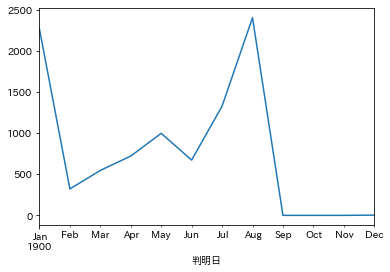

In [ ]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['day'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['番号']

判明日
1900-01-31    2269
1900-02-28     322
1900-03-31     547
1900-04-30     722
1900-05-31     999
1900-06-30     673
1900-07-31    1330
1900-08-31    2407
1900-09-30       0
1900-10-31       0
1900-11-30       0
1900-12-31       3
Freq: M, Name: 番号, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

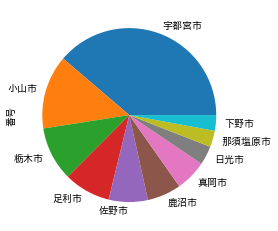

In [ ]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     3016
小山市      1069
栃木市       783
足利市       674
佐野市       565
鹿沼市       491
真岡市       452
日光市       272
那須塩原市     237
下野市       226
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

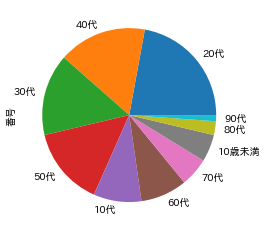

In [ ]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      2047
40代      1517
30代      1405
50代      1357
10代       824
60代       800
70代       494
10歳未満     468
80代       237
90代       105
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

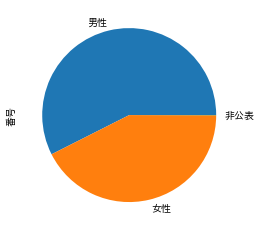

In [ ]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [ ]:
corona_sei

性別
男性     5326
女性     3942
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

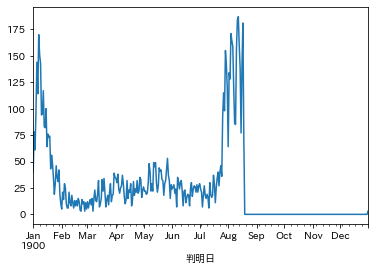

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号']

判明日
1900-01-01     40
1900-01-02     78
1900-01-03     61
1900-01-04     97
1900-01-05    144
             ... 
1900-12-27      0
1900-12-28      0
1900-12-29      0
1900-12-30      0
1900-12-31      3
Freq: D, Name: 番号, Length: 365, dtype: int64

<h1>今月のデータ</h1>

In [ ]:
dt_now = dt.datetime.now()
if dt_now.month<10:
    corona_today=corona[corona['day'].str.startswith('0'+str(dt_now.month))]
else:
    corona_today=corona[corona['day'].str.startswith(str(dt_now.month))]
corona_today

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,day,Year
0,0,0,10781,30代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4002例目,08-18,2021
1,1,1,10780,10代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4001例目,08-18,2021
2,2,2,10779,10代,女性,宇都宮市,調査中,1900-08-18,10783･10784例目の家族\n※宇都宮市4000例目,08-18,2021
3,3,3,10778,10代,女性,宇都宮市,調査中,1900-08-18,10783･10785例目の家族\n※宇都宮市3999例目,08-18,2021
4,4,4,10777,40代,男性,宇都宮市,調査中,1900-08-18,10784･10785例目の家族\n※宇都宮市3998例目,08-18,2021
...,...,...,...,...,...,...,...,...,...,...,...
2423,2424,2424,8357,10代,女性,真岡市,現在調査中,1900-08-01,7958例目の接触者,08-01,2021
2424,2425,2425,8356,50代,女性,芳賀町,7月31日,1900-08-01,7969例目の接触者,08-01,2021
2425,2426,2426,8355,30代,男性,日光市,7月29日,1900-08-01,NaN,08-01,2021
2426,2427,2427,8354,70代,男性,日光市,なし,1900-08-01,8182例目の接触者,08-01,2021


<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

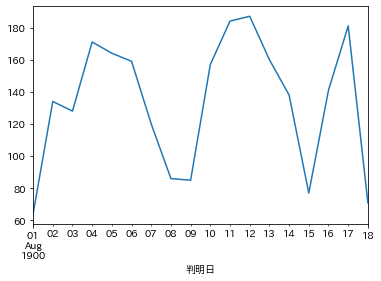

In [ ]:
corona_today.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

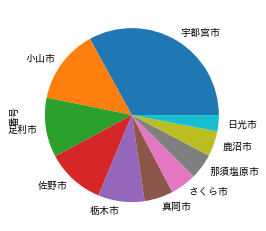

In [ ]:
corona_place=corona_today.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     647
小山市      270
足利市      217
佐野市      213
栃木市      169
真岡市      105
さくら市      95
那須塩原市     93
鹿沼市       92
日光市       59
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

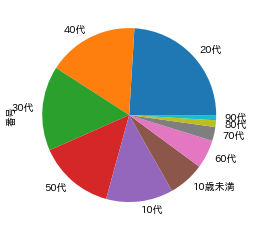

In [ ]:
corona_nen=corona_today.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      578
40代      405
30代      378
50代      339
10代      300
10歳未満    161
60代      128
70代       62
80代       30
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

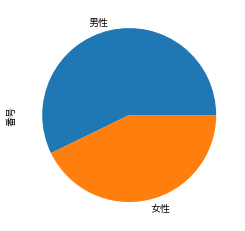

In [ ]:
corona_sei=corona_today.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

<h2>昨年のデータの可視化</h2>

<AxesSubplot:xlabel='判明日'>

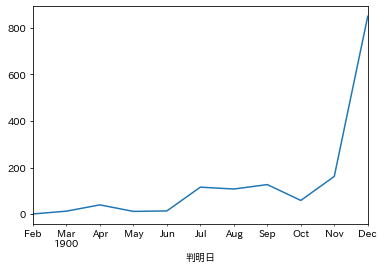

In [ ]:
corona1.groupby(pandas.Grouper(key='判明日', freq='M')).count()['day'].plot()